In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import norm


# Download the date
https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip


In [2]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip

In [3]:
# !unzip codon_usage.csv.zip

# Data Preprocessing

In [4]:
def read_data(file_name):
    """
    Reads in a csv file and returns a dataframe
    """
    return pd.read_csv(file_name, low_memory=False)

dataset = read_data('codon_usage.csv')

In [5]:
# dataset = read_data('codon_usage.csv')
dataset.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [6]:
dataset

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [7]:
# dataset.dropna(inplace=True)

dataset['Kingdom'].value_counts()


bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [8]:
print(dataset.isnull().sum())

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64


<AxesSubplot:>

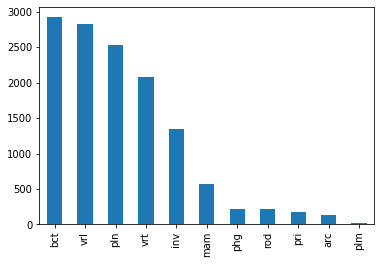

In [9]:
dataset['Kingdom'].value_counts().plot(kind='bar')

In [10]:
dataset['Kingdom'].unique()

array(['vrl', 'arc', 'bct', 'phg', 'plm', 'pln', 'inv', 'vrt', 'mam',
       'rod', 'pri'], dtype=object)

In [11]:
dataset['Kingdom'] = dataset['Kingdom'].map({   'arc': 0, 'bct': 1, 
                                                'phg': 2, 'plm': 3, 
                                                'pln': 4, 'inv': 5, 
                                                'vrt': 6, 'mam': 7,
                                                'rod': 8, 'pri': 9, 'vrl':10})

<AxesSubplot:>

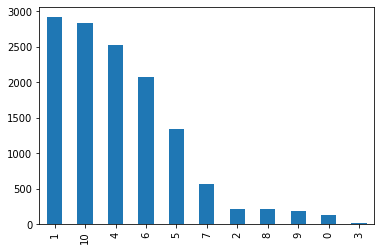

In [12]:
dataset['Kingdom'].value_counts().plot(kind='bar')

# Findings

> Data of 

In [13]:
dataset = dataset.drop(dataset[dataset['SpeciesID']==353569].index)
# dataset[dataset['SpeciesID']==353569]

In [14]:
X = dataset.iloc[:, 5:].values.astype(float)
y = dataset.iloc[:, 0]

In [15]:
y

0        10
1        10
2        10
3        10
4        10
         ..
13023     9
13024     9
13025     9
13026     9
13027     9
Name: Kingdom, Length: 13027, dtype: int64

In [16]:
X

array([[0.01654, 0.01203, 0.0005 , ..., 0.00251, 0.0005 , 0.     ],
       [0.02714, 0.01357, 0.00068, ..., 0.00271, 0.00068, 0.     ],
       [0.01974, 0.0218 , 0.01357, ..., 0.00391, 0.     , 0.00144],
       ...,
       [0.01423, 0.03321, 0.01661, ..., 0.00356, 0.00119, 0.02017],
       [0.01757, 0.02028, 0.00767, ..., 0.00099, 0.00079, 0.00156],
       [0.01778, 0.03724, 0.01732, ..., 0.00156, 0.00114, 0.02161]])

<AxesSubplot:>

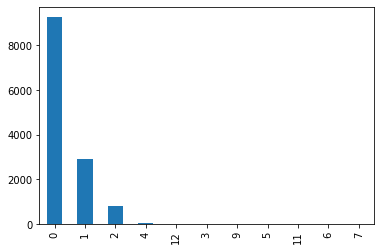

In [17]:
dataset['DNAtype'].value_counts().plot(kind='bar')

In [18]:
class GaussianNaiveBayes:
  def __init__(self, X, y, laplace_smoothing_value, discrete, laplace, classes):
    # update your Naive Bayes class functions to account for a discrete classification using what we have learned in the class. 
    self.X =X # training data
    self.y = y # y is the original classes
    self.laplace_smoothing_value = laplace_smoothing_value # laplace smoothing value
    self.discrete = discrete # boolean variable to indicate if the data is discrete or continuous
    self.laplace = laplace  # boolean for laplace smoothing
    self.classes = classes  # this is the number of classes in the data



  def splitData(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=1)
    print('Training data size: ', X_train.shape) # (890, 10)
    print('Test data size: ', X_test.shape) # (190, 10)
    return X_train, X_test, y_train, y_test # return the training and test data 



  def fitDistribution(self, data):

    mean = np.mean(data) # mean of the data
    std = np.std(data) # standard deviation of the data

    dist = norm(mean, std) # create a normal distribution with the mean and standard deviation 

    return dist # return the distribution



  def laplaceSmoothing(self, classes, length):
    # print('type 0 ', type(class0))
    # print('size 0 ', class0.size)
    # print('type 1 ', type(class1))
    # print('size 1 ', class1.size)
    # smooth0 = (class0 + self.laplace_smoothing_value) / ( (class0.size) + self.laplace_smoothing_value * self.n_features)
    # smooth1 = (class1 + self.laplace_smoothing_value) / ( (class1.size) + self.laplace_smoothing_value * self.n_features)
    # smooth2 = (class2 + self.laplace_smoothing_value) / ( (class2.size) + self.laplace_smoothing_value * self.n_features)
    # smooth3 = (class3 + self.laplace_smoothing_value) / ( (class3.size) + self.laplace_smoothing_value * self.n_features)
    # smooth4 = (class4 + self.laplace_smoothing_value) / ( (class4.size) + self.laplace_smoothing_value * self.n_features)
    # smooth5 = (class5 + self.laplace_smoothing_value) / ( (class5.size) + self.laplace_smoothing_value * self.n_features)
    # smooth6 = (class6 + self.laplace_smoothing_value) / ( (class6.size) + self.laplace_smoothing_value * self.n_features)
    # smooth7 = (class7 + self.laplace_smoothing_value) / ( (class7.size) + self.laplace_smoothing_value * self.n_features)
    # smooth8 = (class8 + self.laplace_smoothing_value) / ( (class8.size) + self.laplace_smoothing_value * self.n_features)
    # smooth9 = (class9 + self.laplace_smoothing_value) / ( (class9.size) + self.laplace_smoothing_value * self.n_features)
    # smooth10 = (class10 + self.laplace_smoothing_value) / ( (class10.size) + self.laplace_smoothing_value * self.n_features)
    smooths = [] # create an empty list to store the smoothed values
    for i in range(length): 
      # add the laplace smoothing value to the class and divide by the size of the class plus the laplace smoothing value times the number of features
      smooths[i] = (classes[i] + self.laplace_smoothing_value) / ( (classes[i].size) + self.laplace_smoothing_value * self.n_features) 
    
    # return the smoothed values
    
    return smooths 
  



  def evaluate(self, y, y_predicted):
    '''

      Takes original classes and predicted classes as input

      Return the values of precision, recall and accuracy
    
    '''
    y = ( y==1 )
    y_predicted = ( y_predicted == 1 )

    precision = (y&y_predicted).sum() / y_predicted.sum()
    recall = (y&y_predicted).sum() / y.sum()
    accuracy = (y==y_predicted).sum() / y.size


    return precision, recall, accuracy



  # def probability(self, X, dist1, dist2, prior):
  #   return prior * ( dist1.pdf(X[0]) *  dist2.pdf(X[1]))


  def probability(self, data):
    # py0 = 1
    # py1 = 1
    py = np.ones(11) # create an array of ones to store the probabilities


    if self.discrete:
      for i in range(self.n_features): # for each feature
        # py[0] *= self.laplaceSmoothing(self.class0[i], self.n_features)

        for j in range(11): # for each class
          print('i, j ', i, j) # print the feature and class
          # multiply the probability by the probability of the feature given the class
          py[j] *= self.features['X'+str(i)+str(j)] 

        # py0 *= self.features['X'+str(i)+str(data[i])+'0']
        # py1 *= self.features['X'+str(i)+str(data[i])+'1']
        # py2 *= self.features['X'+str(i)+str(data[i])+'2']
        # py3 *= self.features['X'+str(i)+str(data[i])+'3']
        # py4 *= self.features['X'+str(i)+str(data[i])+'4']
        # py5 *= self.features['X'+str(i)+str(data[i])+'5']

    else:
      for i in range(self.n_features):
        for j in range(11):
          py[j] *= self.features['X'+str(i)+str(j)].pdf(data[i])
        # py0 *= self.features['X'+str(i)+'0'].pdf(data[i])
        # py1 *= self.features['X'+str(i)+'1'].pdf(data[i])

    for i in range(11):
      py[i] *= self.prior[i]
    
    return  py



  def laplaceProbability(self, data):
    # py0 = 1
    # py1 = 1

    py = np.ones(11) # create an array of ones to store the probabilities

    if self.discrete:
      for i in range(self.n_features):
        print(data[i])
        print('X'+str(i)+'0')
        smooths = self.laplaceSmoothing(self.features, self.n_features)
        class0 = self.features['X'+str(i)+'0']
        smooth0 , smooth1, smooth2, smooth3, smooth4, smooth5, smooth6, smooth7, smooth8, smooth9, smooth10 = self.laplaceSmoothing( class0 = self.features['X'+str(i)+'0'], class1 = self.features['X'+str(i)+'1'], class2 = self.features['X'+str(i)+'2'], 
                                                    class3 = self.features['X'+str(i)+'3'], class4 = self.features['X'+str(i)+'4'], class5 = self.features['X'+str(i)+'5'], 
                                                    class6 = self.features['X'+str(i)+'6'], class7 = self.features['X'+str(i)+'7'], class8 = self.features['X'+str(i)+'8'], 
                                                    class9 = self.features['X'+str(i)+'9'], class10 = self.features['X'+str(i)+'10'])
        print(smooth0, smooth1, smooth2, smooth3, smooth4, smooth5, smooth6, smooth7, smooth8, smooth9, smooth10)
        py0 *= smooth0
        py1 *= smooth1
        py2 *= smooth2
        py3 *= smooth3
        py4 *= smooth4
        py5 *= smooth5
        py6 *= smooth6
        py7 *= smooth7
        py8 *= smooth8
        py9 *= smooth9
        py10 *= smooth10
    
    else:
      for i in range(self.n_features):
        pdf0 = self.features['X'+str(i)+'0'].pdf(data[i])
        pdf1 = self.features['X'+str(i)+'1'].pdf(data[i])
        pdf2 = self.features['X'+str(i)+'2'].pdf(data[i])
        pdf3 = self.features['X'+str(i)+'3'].pdf(data[i])
        pdf4 = self.features['X'+str(i)+'4'].pdf(data[i])
        pdf5 = self.features['X'+str(i)+'5'].pdf(data[i])
        pdf6 = self.features['X'+str(i)+'6'].pdf(data[i])
        pdf7 = self.features['X'+str(i)+'7'].pdf(data[i])
        pdf8 = self.features['X'+str(i)+'8'].pdf(data[i])
        pdf9 = self.features['X'+str(i)+'9'].pdf(data[i])
        pdf10 = self.features['X'+str(i)+'10'].pdf(data[i])
        smooth0 , smooth1, smooth2, smooth3, smooth4, smooth5, smooth6, smooth7, smooth8, smooth9, smooth10  = self.laplaceSmoothing(pdf0, pdf1, pdf2, pdf3, pdf4, pdf5, pdf6, pdf7, pdf8, pdf9, pdf10)
        py0 *= smooth0
        py1 *= smooth1
        py2 *= smooth2
        py3 *= smooth3
        py4 *= smooth4
        py5 *= smooth5
        py6 *= smooth6
        py7 *= smooth7
        py8 *= smooth8
        py9 *= smooth9
        py10 *= smooth10


    return  py0 * self.prior_0, py1 * self.prior_1, py2 * self.prior_2, py3 * self.prior_3, py4 * self.prior_4, py5 * self.prior_5, py6 * self.prior_6, py7 * self.prior_7, py8 * self.prior_8, py9 * self.prior_9, py10 * self.prior_10                                                                            




  def fit(self):

    self.X_train, self.X_test, self.y_train, self.y_test = self.splitData()
    X_training = self.X_train.copy()
    for i in range(self.classes):
      X_training[i] = self.X_train[self.y_train == i]
      self.prior[i] = len(X_training[i]) / len(self.X_train)

    # X0_train = self.X_train[self.y_train == 0]
    # X1_train = self.X_train[self.y_train == 1]
    # X2_train = self.X_train[self.y_train == 2]
    # X3_train = self.X_train[self.y_train == 3]
    # X4_train = self.X_train[self.y_train == 4]
    # X5_train = self.X_train[self.y_train == 5]
    # X6_train = self.X_train[self.y_train == 6]
    # X7_train = self.X_train[self.y_train == 7]
    # X8_train = self.X_train[self.y_train == 8]
    # X9_train = self.X_train[self.y_train == 9]
    # X10_train = self.X_train[self.y_train == 10]

    for i in range(self.classes):
      self.prior[i] = len(X_training[i]) / len(self.X_train)

    # self.prior_1 = len(X1_train) / len(self.X_train)
    # self.prior_0 = len(X0_train) / len(self.X_train)
    # self.prior_2 = len(X2_train) / len(self.X_train)
    # self.prior_3 = len(X3_train) / len(self.X_train)
    # self.prior_4 = len(X4_train) / len(self.X_train)
    # self.prior_5 = len(X5_train) / len(self.X_train)
    # self.prior_6 = len(X6_train) / len(self.X_train)
    # self.prior_7 = len(X7_train) / len(self.X_train)
    # self.prior_8 = len(X8_train) / len(self.X_train)
    # self.prior_9 = len(X9_train) / len(self.X_train)
    # self.prior_10 = len(X10_train) / len(self.X_train)
    


    self.n_features = self.X_train.shape[1]
    print('Number of features: ', self.n_features)
    self.features = {}
    
    if self.discrete:

      print('Discrete Data')

      for i in range(self.n_features):
        for j in range(self.n_classes):
          for k in range(self.n_classes):
            self.features['X'+str(i)+str(j)+str(k)] = ( X_training[i][X_training[:,i] == j] ) / len(X_training[i])

        # self.features['X'+str(i)+'00'] = ( (X0_train[ X0_train[:,i]==0 ]).sum() ) / len(X0_train)
        # self.features['X'+str(i)+'01'] = ( (X0_train[ X0_train[:,i]==0 ]).sum() ) / len(X1_train)
        # self.features['X'+str(i)+'10'] = ( (X0_train[ X0_train[:,i]==1 ]).sum() ) / len(X0_train)
        # self.features['X'+str(i)+'11'] = ( (X0_train[ X0_train[:,i]==1 ]).sum() ) / len(X1_train)

    
    else:

      print('Continuous Data')

      for i in range(self.n_features):
        for j in range(self.n_classes):
          self.features['X'+str(i)+str(j)] = self.fitDistribution(X_training[j][:,i])
          
        # self.features['X'+str(i)+'0'] = self.fitDistribution(X0_train[:, i])
        # self.features['X'+str(i)+'1'] = self.fitDistribution(X1_train[:, i])


    # self.X00_dist = self.fitDistribution(X0_train[:, 0])
    # self.X01_dist = self.fitDistribution(X0_train[:, 1])

    # self.X10_dist = self.fitDistribution(X1_train[:, 0])
    # self.X11_dist = self.fitDistribution(X1_train[:, 1])

  
  
  def predict(self):
    count = 0
    y_predicted = []
    y = []
    for sample, target in zip(self.X_test, self.y_test):
      # py0 = self.probability(sample, self.X00_dist, self.X01_dist, self.prior_0)
      # py1 = self.probability(sample, self.X10_dist, self.X11_dist, self.prior_1)

      # print("P(y=0|%s = %.3f" % (sample, py0*100))
      # print("P(y=1|%s = %.3f" % (sample, py1*100))

      if self.laplace:
        py0, py1 = self.laplaceProbability(sample)
      
      else:
        py0, py1 = self.probability(sample)

      print("Model predicted class {} and truth was {}".format(np.argmax([py0,py1]), target))
      y_predicted.append(np.argmax([py0,py1]))
      y.append(target)
      # np.append(y_predicted, np.argmax([py0,py1]))
      # np.append(y, target)
      # y = target
      if np.argmax([py0,py1]) != target :
        count+=1

      # precision, recall, accuracy = self.evaluate(y, y_predicted)
      # print("precision:", precision)
      # print("recall:", recall)
      # print("accuracy:", accuracy)

    
    print(count)
    # print(y)
    y_predicted = np.array(y_predicted)
    y = np.array(y)

    precision, recall, accuracy = self.evaluate(y, y_predicted)
    print("precision:", precision)
    print("recall:", recall)
    print("accuracy:", accuracy)
    print("f1 score:", 2*(precision*recall)/(precision+recall))
    print(set(y_predicted))

      

  



In [19]:
clf = GaussianNaiveBayes(X,y, laplace_smoothing_value=0.5, discrete=False, laplace=True, classes=2)

TypeError: __init__() missing 1 required positional argument: 'classes'

In [ ]:
clf.fit()

Training data size:  (9118, 64)
Test data size:  (3909, 64)
Number of features:  64
Continuous Data


In [ ]:
clf.predict()

Model predicted class 0 and truth was 5
Model predicted class 0 and truth was 5
Model predicted class 0 and truth was 10
Model predicted class 0 and truth was 10
Model predicted class 1 and truth was 5
Model predicted class 0 and truth was 4
Model predicted class 0 and truth was 10
Model predicted class 0 and truth was 4
Model predicted class 0 and truth was 10
Model predicted class 0 and truth was 10
Model predicted class 0 and truth was 10
Model predicted class 0 and truth was 10
Model predicted class 0 and truth was 6
Model predicted class 1 and truth was 4
Model predicted class 1 and truth was 6
Model predicted class 1 and truth was 2
Model predicted class 1 and truth was 1
Model predicted class 0 and truth was 7
Model predicted class 0 and truth was 1
Model predicted class 0 and truth was 10
Model predicted class 1 and truth was 7
Model predicted class 0 and truth was 9
Model predicted class 0 and truth was 10
Model predicted class 1 and truth was 6
Model predicted class 1 and tru